##**Deep Learning:** Homework 1
####**Author:** Rudy Martinez
####**Date:** 8/28/2021

##### **Google Colab Link:** https://colab.research.google.com/drive/18foX8skV_cUcMrFoC9OKSEHc-5xmXwmf?usp=sharing

#### **Libraries**

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

#### **Part 1**
**(1) Import the iris flowers dataset using pandas.read_csv() with the following URL link (10pt); The DataFrame must have the following column names: `sepal length (cm)`, `sepal width (cm)`, `petal length (cm)`, `petal width (cm)`, and `class`; (5pt) Print the first 5 rows of the DataFrame (5pt).**

In [70]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','class'])

iris_df = pd.DataFrame(data)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**(2) Summarize the dataset**
  - Print out a concise summary of the DataFrame using .info() and the shape of the DataFrame (5 pt)

In [71]:
print(iris_df.info())
print("\n\n Shape:", iris_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


 Shape: (150, 5)


  - Print out the statistics of the continuous columns using .describe() (i.e., the four attribute columns) (5 pt)

In [72]:
print(iris_df[0:3].describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count                3.0          3.000000           3.000000      3.000000e+00
mean                 4.9          3.233333           1.366667      2.000000e-01
std                  0.2          0.251661           0.057735      3.399350e-17
min                  4.7          3.000000           1.300000      2.000000e-01
25%                  4.8          3.100000           1.350000      2.000000e-01
50%                  4.9          3.200000           1.400000      2.000000e-01
75%                  5.0          3.350000           1.400000      2.000000e-01
max                  5.1          3.500000           1.400000      2.000000e-01


  - Print out the number of rows that belong to each class (5 pt)

In [73]:
iris_pivot = pd.pivot_table(iris_df, values = "sepal length (cm)", index = "class", aggfunc = len, margins = True)
iris_pivot.columns = ['# of Rows']
iris_pivot

,# of Rows
class,
Iris-setosa,50.0
Iris-versicolor,50.0
Iris-virginica,50.0
All,150.0


**(3) Data Visualization**
  - Separate out the first four columns of the original DataFrame into a new DataFrame and print out the first 5 rows of the new DataFrame (5 pt)

In [74]:
iris_subset = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
iris_subset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


  - Univariate Plots: plot a histogram for each column of the new DataFrame (5 pt)

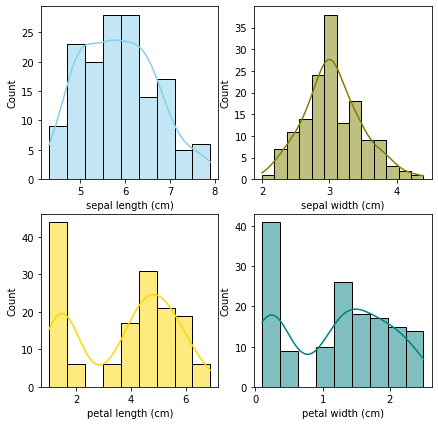

In [75]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sb.histplot(iris_subset, x="sepal length (cm)", kde=True, color="skyblue", ax=axs[0, 0])
sb.histplot(iris_subset, x="sepal width (cm)", kde=True, color="olive", ax=axs[0, 1])
sb.histplot(iris_subset, x="petal length (cm)", kde=True, color="gold", ax=axs[1, 0])
sb.histplot(iris_subset, x="petal width (cm)", kde=True, color="teal", ax=axs[1, 1])

plt.show()

  - Multivariate Plots: plot a scatter plot for each pair of the columns of the new DataFrame using the pandas.plotting.scatter_matrix function (5 pt)

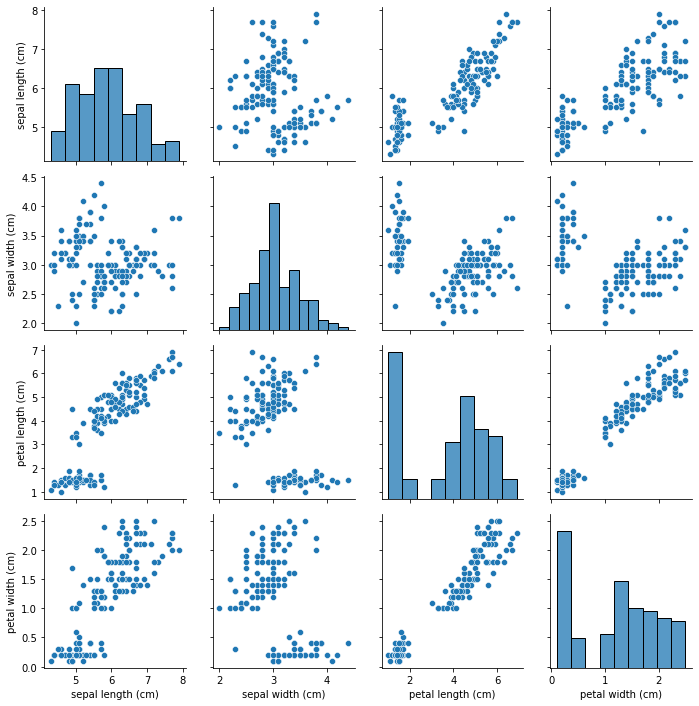

In [76]:
multi_plot = sb.PairGrid(iris_subset)
multi_plot.map_diag(sb.histplot)
multi_plot.map_offdiag(sb.scatterplot)

#### **Part 2**
**(1) Import the `Census Income (Adult)` dataset using Pandas, use the 14 attribute names (i.e., `age`, `workclass`, ….., `native-country`) as explained in the dataset description as the first 14 column names and `salary` as the last column name (5 pt) , view the strings ‘?’, ‘ ?’, ‘? ’, or ‘ ? ’ as the missing values and replace them with NaN (the default missing value marker in Pandas) (10 pt), and print out the first five rows of the DataFrame. (5 pt)**

In [77]:
census_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", 
                          names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                                   'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                                   'hours-per-week', 'native-country', 'salary'],
                          index_col = False)

missing_values = ['?', ' ?', '? ', ' ? ']

census_df = census_data.replace(missing_values, np.nan)
census_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**(2) Dataset checking and cleaning**
  - Print out a concise summary of the DataFrame and observe if null values exist in each column of the DataFrame by checking the summary (10 pt)

In [78]:
census_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

  - Filter out the rows that contain missing values and print them out (10 pt)

In [79]:
null_rows = census_df[census_df.isna().any(axis=1)]
print(null_rows)

       age workclass  fnlwgt  ... hours-per-week  native-country  salary
14      40   Private  121772  ...             40             NaN    >50K
27      54       NaN  180211  ...             60           South    >50K
38      31   Private   84154  ...             38             NaN    >50K
51      18   Private  226956  ...             30             NaN   <=50K
61      32       NaN  293936  ...             40             NaN   <=50K
...    ...       ...     ...  ...            ...             ...     ...
32530   35       NaN  320084  ...             55   United-States    >50K
32531   30       NaN   33811  ...             99   United-States   <=50K
32539   71       NaN  287372  ...             10   United-States    >50K
32541   41       NaN  202822  ...             32   United-States   <=50K
32542   72       NaN  129912  ...             25   United-States   <=50K

[2399 rows x 15 columns]


  - Drop the rows of the DataFrame with missing values using .dropna() and observe if null values still exist in each column by checking the concise summary again (10 pt)

In [80]:
census_new = census_df.dropna(axis=1)
census_new.isnull().sum()

age               0
fnlwgt            0
education         0
education-num     0
marital-status    0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
salary            0
dtype: int64